In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp



In [6]:
#UNIVARIATE ANALYSIS
#numerical attributes:
#mean , median , mode,standard deviation  
df=pd.read_csv("blinkit_products.csv")
print("Mean:", df["price"].mean())  
print("Median:", df["price"].median())  
print("Mode:", df["price"].mode()[0])  
print("Standard Deviation:", df["price"].std())

Mean: 488.356828358209
Median: 442.185
Mode: 826.21
Standard Deviation: 298.487199586296


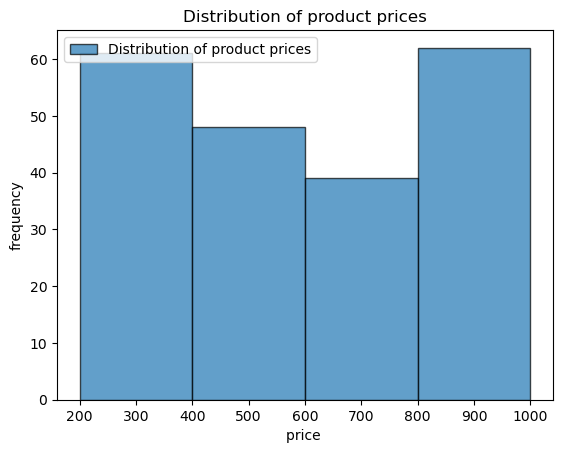

In [14]:
#histogram 
frequency_range = [200,400,600,800,1000]
plt.hist(df['price'], frequency_range, label = 'Distribution of product prices',edgecolor='black',alpha=0.7)
plt.xlabel('price ')
plt.ylabel('frequency')
plt.title('Distribution of product prices')
plt.legend(loc='upper left')
plt.show()

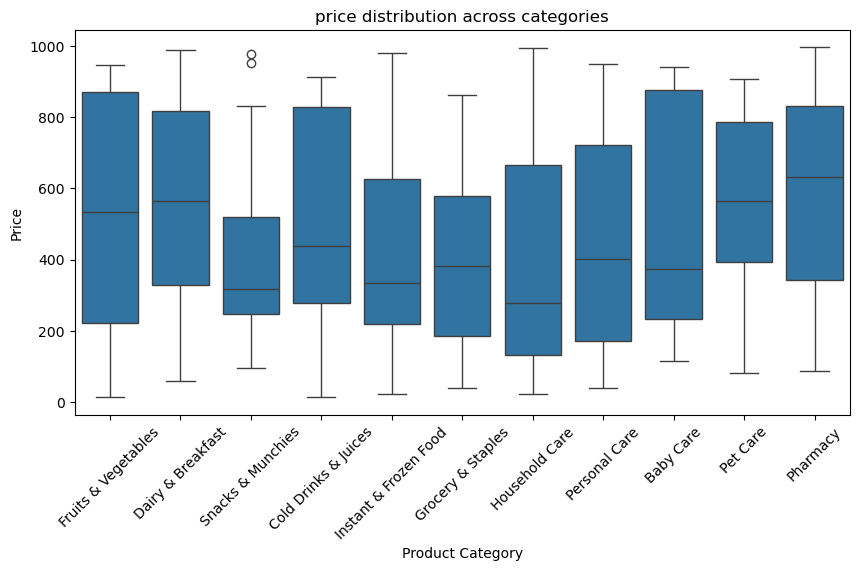

In [3]:
#  boxplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

df=pd.read_csv("C:\\Users\\NANCY\\Downloads\\blinkit_products.csv")
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['category'], y=df['price'])

plt.xlabel("Product Category")
plt.ylabel("Price")
plt.title("price distribution across categories")
plt.xticks(rotation=45) 

plt.show()



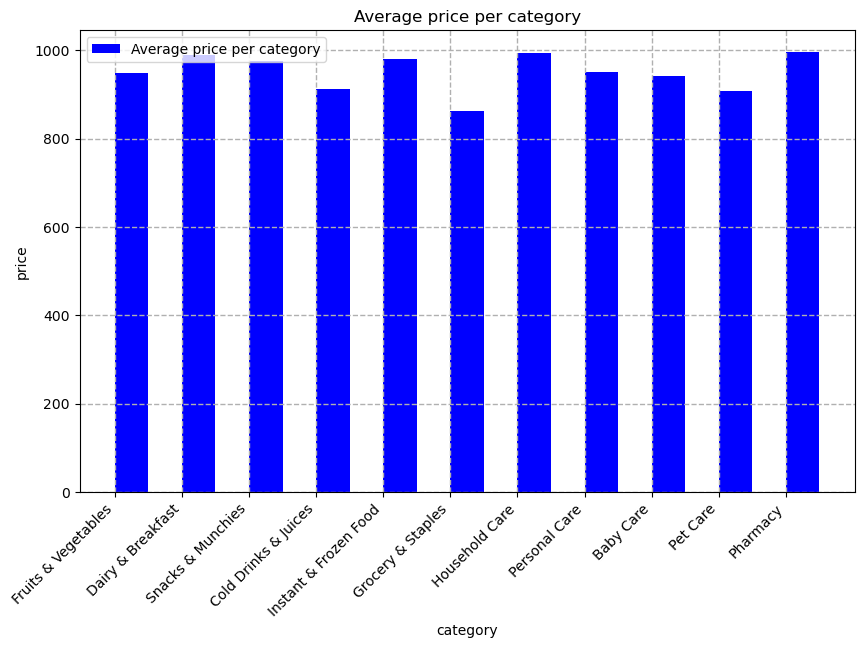

In [15]:
# categorical attributes:
#bar chart
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("C:\\Users\\NANCY\\Downloads\\blinkit_products.csv")

plt.figure(figsize=(10, 6))
plt.bar(x=df['category'] ,height= df['price'], width=0.5,label='Average price per category',align='edge', color='b')
plt.xticks(rotation=45, ha='right')
plt.xlabel('category')
plt.ylabel('price')
plt.legend(loc='upper left')
plt.title('Average price per category')
plt.grid(True, linewidth= 1, linestyle="--")
plt.show()


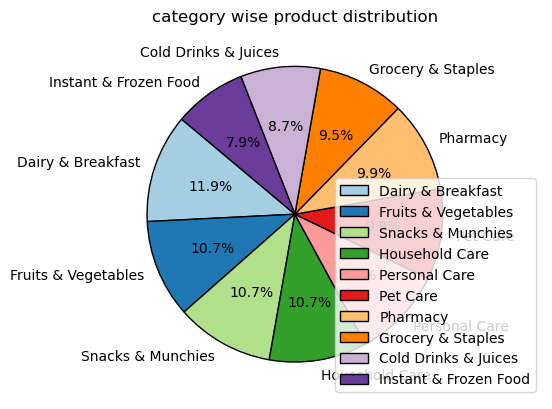

category_percentage: category
Dairy & Breakfast        11.904762
Fruits & Vegetables      10.714286
Snacks & Munchies        10.714286
Household Care           10.714286
Personal Care             9.920635
Pet Care                  9.920635
Pharmacy                  9.920635
Grocery & Staples         9.523810
Cold Drinks & Juices      8.730159
Instant & Frozen Food     7.936508
Name: count, dtype: float64


In [23]:
# pie chart 
# count and count%
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("C:\\Users\\NANCY\\Downloads\\blinkit_products.csv")
category_counts = df['category'].value_counts().head(10)

plt.axis("equal")
plt.pie(category_counts, labels=category_counts.index,autopct= '%1.1f%%', 
        colors=plt.cm.Paired.colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.legend(loc='lower right')
plt.title('category wise product distribution')
plt.show()
category_percentage = (category_counts / category_counts.sum()) * 100
print("category_percentage:",category_percentage)

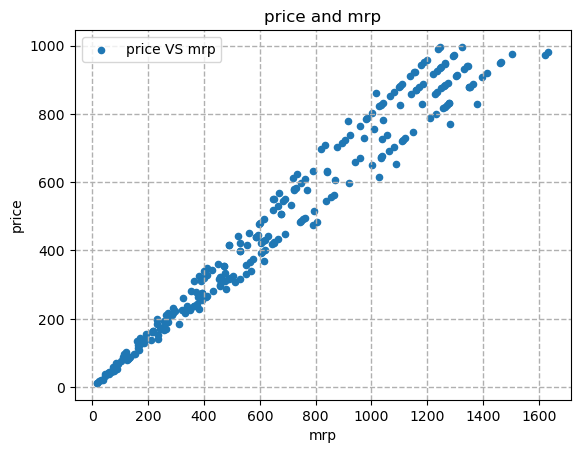

In [26]:
#BIVARIATE ANALYSIS
# Scatter plot
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("C:\\Users\\NANCY\\Downloads\\blinkit_products.csv")

df.plot.scatter(x='mrp',y='price',label = 'price VS mrp')
plt.xlabel('mrp')
plt.ylabel('price')
plt.legend(loc='upper left')
plt.title('price and mrp')
plt.grid(True, linewidth= 1, linestyle="--")
plt.show()

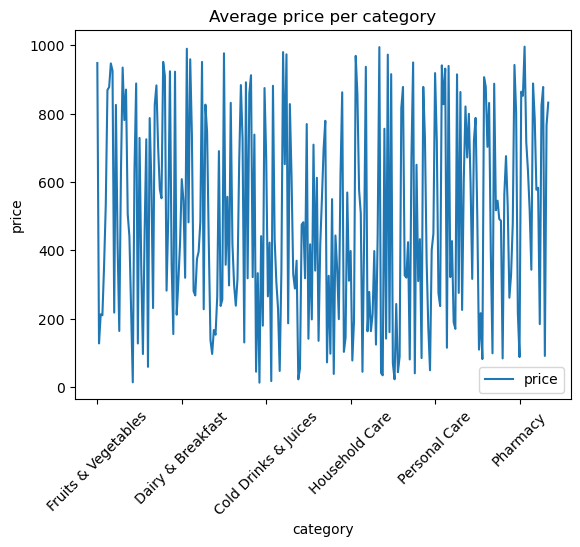

In [27]:
# line chart 
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("C:\\Users\\NANCY\\Downloads\\blinkit_products.csv")

df.plot.line(x='category', y='price') 
plt.xticks(rotation=45) 
plt.xlabel('category')
plt.ylabel('price')
plt.title('Average price per category')
plt.show()

                   product_id     price       mrp  margin_percentage  \
product_id           1.000000 -0.113843 -0.100528           0.033336   
price               -0.113843  1.000000  0.982195          -0.062633   
mrp                 -0.100528  0.982195  1.000000           0.097916   
margin_percentage    0.033336 -0.062633  0.097916           1.000000   
shelf_life_days     -0.008379 -0.058469 -0.043183           0.009517   
min_stock_level     -0.041629 -0.040858 -0.054902          -0.047959   
max_stock_level     -0.028918 -0.006327 -0.015554          -0.058727   

                   shelf_life_days  min_stock_level  max_stock_level  
product_id               -0.008379        -0.041629        -0.028918  
price                    -0.058469        -0.040858        -0.006327  
mrp                      -0.043183        -0.054902        -0.015554  
margin_percentage         0.009517        -0.047959        -0.058727  
shelf_life_days           1.000000         0.041920        -0.003718

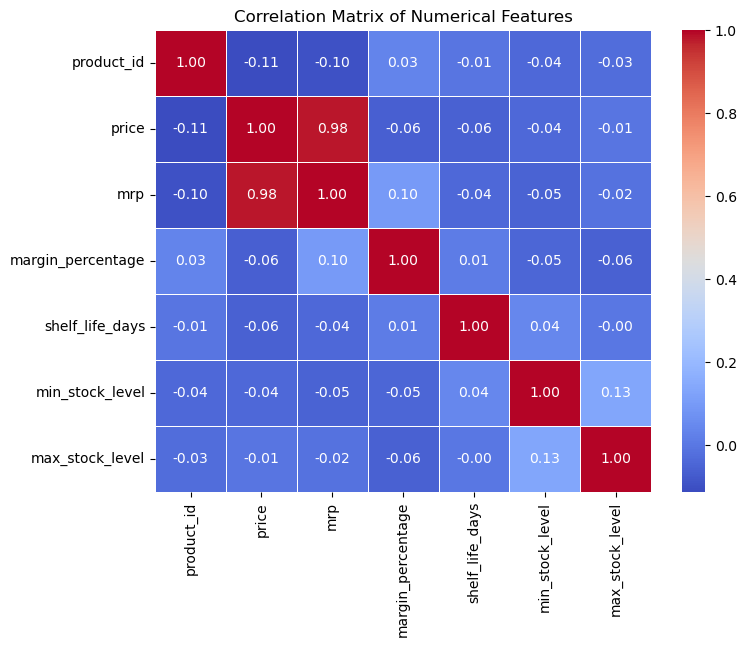

In [28]:
#correlation matrix and visualize it using a heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("C:\\Users\\NANCY\\Downloads\\blinkit_products.csv")
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [9]:
#chi^2 test
import pandas as pd
import scipy.stats as stats

df = pd.read_csv("C:\\Users\\NANCY\\Downloads\\blinkit_products.csv")

contingency_table = pd.crosstab(df['price'], df['mrp'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

if p < 0.05:
    print("Conclusion: Reject Null Hypothesis (Variables are dependent)")
else:
    print("Conclusion: Fail to Reject Null Hypothesis (No relationship)")


Chi-square statistic: 71287.99999999996
P-value: 0.2398856364451188
Degrees of freedom: 71022
Conclusion: Fail to Reject Null Hypothesis (No relationship)


In [19]:
#Z test , P test , chi^2 test , Apnova

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = pd.read_csv("C:\\Users\\NANCY\\Downloads\\blinkit_products.csv")

print(df.head())

# Z-test 
def z_test(df, col1, col2):
    mean1 = df[col1].mean()
    mean2 = df[col2].mean()
    std1 = df[col1].std()
    std2 = df[col2].std()
    n1 = len(df[col1])
    n2 = len(df[col2])
    
    z_score = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))
    p_value = stats.norm.sf(abs(z_score)) * 2  
    return z_score, p_value

z_score, p_value = z_test(df, 'price', 'mrp')
print(f"Z-test: Z-score = {z_score}, p-value = {p_value}")

# t-test  
def t_test(df, col1, col2):
    t_stat, p_value = stats.ttest_ind(df[col1], df[col2], nan_policy='omit')
    return t_stat, p_value


t_stat, p_value = t_test(df, 'price', 'mrp')
print(f"t-test: t-statistic = {t_stat}, p-value = {p_value}")

# Chi-square test for independence
def chi_square_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    return chi2, p


chi2, p_value = chi_square_test(df, 'category', 'brand')
print(f"Chi-square test: Chi2 = {chi2}, p-value = {p_value}")

# ANOVA for comparing means across multiple groups
def anova_test(df, col, group_col):
    model = ols(f'{col} ~ C({group_col})', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    return anova_table


anova_table = anova_test(df, 'price', 'category')
print("ANOVA table:")
print(anova_table)


   product_id product_name             category                    brand  \
0      153019       Onions  Fruits & Vegetables               Aurora LLC   
1       11422     Potatoes  Fruits & Vegetables           Ramaswamy-Tata   
2      669378     Potatoes  Fruits & Vegetables          Chadha and Sons   
3      848226     Tomatoes  Fruits & Vegetables           Barad and Sons   
4      890623       Onions  Fruits & Vegetables  Sangha, Nagar and Varty   

    price      mrp  margin_percentage  shelf_life_days  min_stock_level  \
0  947.95  1263.93               25.0                3               13   
1  127.16   169.55               25.0                3               20   
2  212.14   282.85               25.0                3               23   
3  209.59   279.45               25.0                3               10   
4  354.52   472.69               25.0                3               27   

   max_stock_level  
0               88  
1               65  
2               70  
3       